

```
Harold Adrián Gómez Gil - Universidad de Antioquia
```

```
LABORATORIO PDS: Practica 2 : Muestreo, cuantización , señales Analogicas y digitales
```



<h1>INTRODUCCION</h1>
<p>
En este laboratorio vamos a aplicar los conceptos de muestreo y cuantificacióon de señnales. Para ello se
usarían se˜ales de audio que se van a re-muestrear y re-cuantificar.
En el procesamiento digital de se˜nales solo se pueden realizar operaciones aritm´eticas sobre un conjunto
finito de n´umeros o observaciones. Para esto existe el muestreo, que consiste en tomar muestras de una se˜nal
anal´ogica a una frecuencia o tasa de muestreo constante, siempre considerando el teorema de Nyquist.
Por otro lado, la cuantificaci´on es el proceso de mapear valores de amplitud continua en un conjunto de
valores contables (conjunto finito). Puede ser aplicado a se˜nales anal´ogicas o a se˜nales en tiempo discreto
</p>

In [30]:
from scipy.io.wavfile import read
from IPython.display import Audio # para escuchar la senal
import numpy as np
import matplotlib.pyplot as plt
from scipy .io. wavfile import write
from scipy.signal import resample

In [69]:
file_audio=('/content/3.wav')
fs,x=read(file_audio)

#MUESTREO

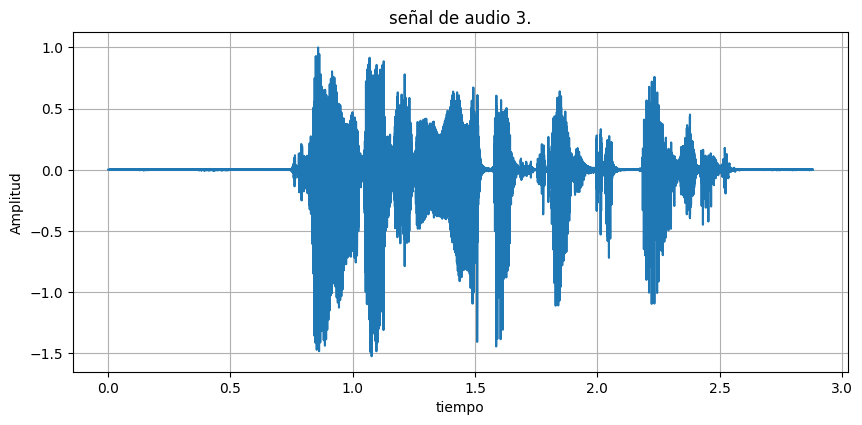

In [70]:


t=np.arange(0,len(x)/fs,1.0/fs)
norm= x/max(x)#normalización de la absisa de amplitud
plt.figure(figsize=(10,15)) #Modificaciónes del figuresize.
plt.subplot(3,1,1)
plt.plot(t,norm)
plt.title('señal de audio 3.')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid()
Audio(x,rate=fs)

In [ ]:
write('/content/doble3.wav',2*fs, x)
write('/content/mitad3.wav',int(fs/2),x)

file_audiodoble=('/content/doble3.wav')
fs_doble,x_doble=read(file_audiodoble)

file_audiomitad=('/content/mitad3.wav')
fs_mitad,x_mitad=read(file_audiomitad)

x_doble=x_doble/max(x_doble)
x_mitad=x_mitad/max(x_mitad)


In [29]:
Audio(x_doble,rate=fs_doble)


In [27]:
Audio(x_mitad,rate=fs_mitad)

##RESPUESTA A LA PREGUNTA
* La principal diferencia cae en la velocidad de la grabación de voz, cuando se reduce la frecuencia de muestreo a la mitad, se tomaran menos puntos, por lo cual hace que la señal de voz suene particularmente lento.

* Cuando se toma el doble de la frecuencia de muestreo, se van a tomar muchos más puntos, por lo cual hace que la voz ó el audio, suene a toda velocidad.

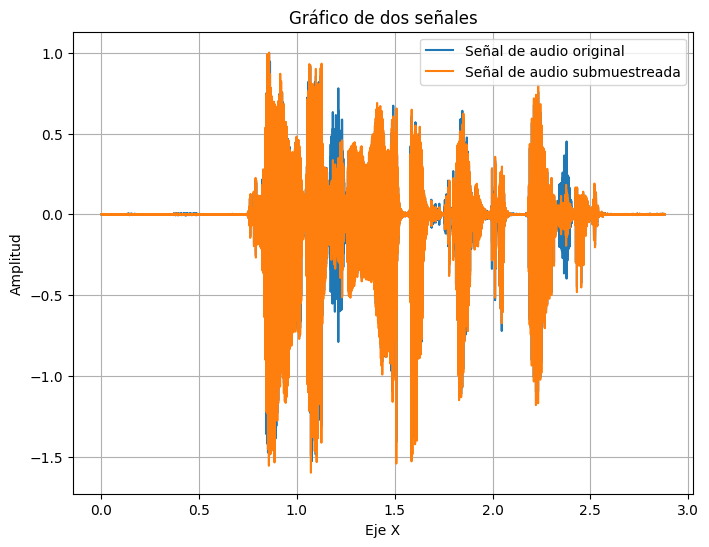

In [47]:
senalsubm=resample(x,int(len(x)/4))

t_su_subm=np.arange(0, (float(len(senalsubm))/(fs/4)), 1.0/(fs/4))#Vector de tiempos de la submuestreada
senalsubmn=senalsubm/max(senalsubm)
# Crear la figura y los ejes
plt.figure(figsize=(8, 6))  # Tamaño opcional para la figura
plt.plot(t,norm , label='Señal de audio original')
plt.plot(t_su_subm,senalsubmn, label='Señal de audio submuestreada')

# Agregar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Amplitud')
plt.title('Gráfico de dos señales')
plt.legend()  # Mostrar leyenda con etiquetas de las señales

# Mostrar el gráfico
plt.grid()
plt.show()

In [44]:
#Audio señal original
Audio(x,rate=fs)

###RESPUESTA A LA PREGUNTA
Cuando se submuestrea la señal original, graficamente se puede ver que se presentan perdidas en la información. Ahora, cuando se escucha el audio generado, se nota que la voz de la persona ya no aparece y al contrario se presenta ruido.

#FRECUENCIA DE NYQUIST Y ALIASING

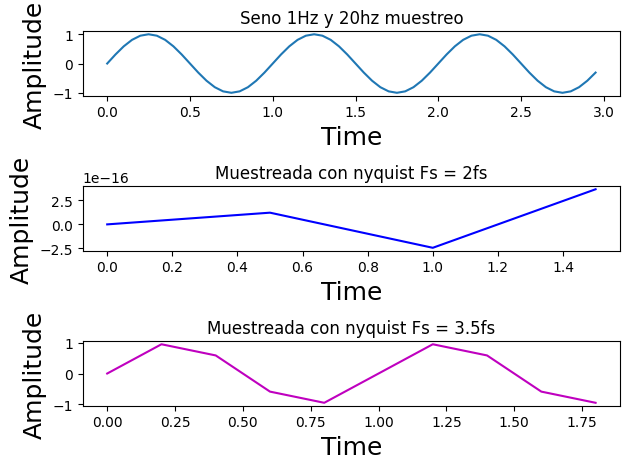

In [61]:
f=1.0 # Frecuencia de la senal
fs=20.0 # Frecuencia de muestreo
t=np.arange(0, 3, 1.0/fs) # Vector de tiempo
signal1 = np.sin(2*np.pi*f*t)

t_nyquist =  np.arange(0,2.0, 1/(2*f))
signal_nyquist =  np.sin(2*np.pi*f*t_nyquist)

t_nyquist2 =  np.arange(0, 2.0, 1/(5*f))
signal_nyquist2=  np.sin(2*np.pi*f*t_nyquist2)

plt.subplot(311)
plt.title('Seno 1Hz y 20hz muestreo')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot(t , signal1 )


#creo la segunda grafica
plt.subplot(312)
plt.title('Muestreada con nyquist Fs = 2fs')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot( t_nyquist, signal_nyquist, "blue")

plt.subplot(313)
plt.title('Muestreada con nyquist Fs = 3.5fs')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot( t_nyquist2, signal_nyquist2, color="m")

plt.tight_layout() # comando para que se ajuste la graficas
plt.show() # mostrar


###RESPUESTA A LA PREGUNTA
Es posible ver que para muestrear la señal original, cuando se tiene un muestreo de 2fs, la señal resultante no alcanza a verse lo suficientemente reconstruida, pero, cuando se incrementa esta frecuencia a mucho más, la señal se reconstruye mucho mejor.

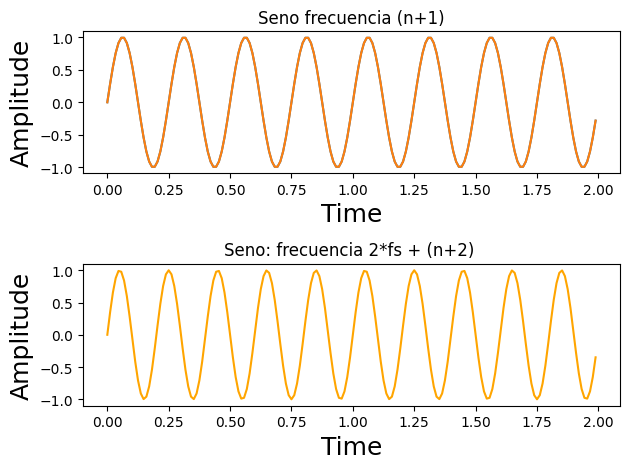

In [169]:
n = 3
fs   =  (n+1)*22     # FRECUENCIA DE MUESTREO
f1   =  (n+1)        # Frecuencia de la senal 1
f2   =  2*fs + (n+2) # Frecuencia de la senal 2

t=np.arange(0, 2.0, 1.0/fs) # Vector de tiempo
x_1 = np.sin(2*np.pi*f1*t)

x_2 =  np.sin(2*np.pi*f2*t)


plt.subplot(211)
plt.title('Seno frecuencia (n+1)')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot(t , x_1)


#creo la segunda grafica
plt.subplot(212)
plt.title('Seno: frecuencia 2*fs + (n+2) ')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot( t, x_2, color="orange")
plt.subplot(211)
plt.title('Seno frecuencia (n+1)')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.plot(t , x_1)



plt.tight_layout() # comando para que se ajuste la graficas
plt.show() # mostrar


###RESPUESTA A LA PREGUNTA
<p> la primera señal , se espera que quede bien representada dado el teorema de nyquist, la frecuencia de muestreo es mucho mayor a la de la señal 1. pero en el otro caso , claramente percibimos que la frecuencia de muestreo es poco mas de la mitad que la frecuancia de la señal 2, aunque se vea bien representada, esto es un claro ejemplo del ALIASING, el cual nos da una señal con una representacion parecia a la original pero que no es igual en cuando a la información que contiene.

#CUANTIFICACION|

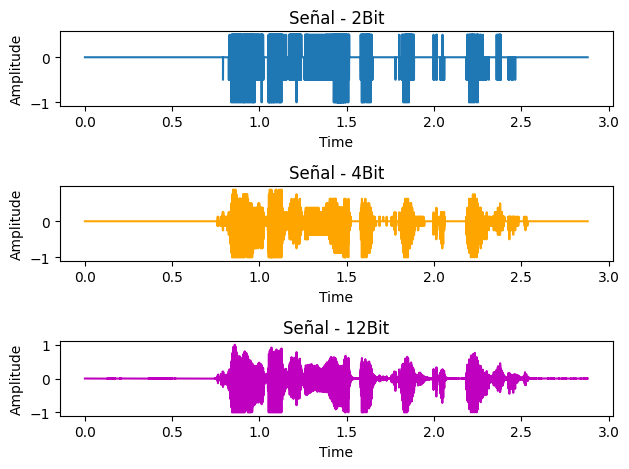

In [72]:
def fxquant (s,bit ):
    # s: senal de entrada , debe estar normalizada entre -1 y 1
    # bit: bits de cuantizacion
    Plus1 =np.power (2, (bit -1))
    X=s* Plus1
    X=np. round (X)
    X=np. minimum (Plus1 -1.0 ,X)
    X=np. maximum ( -1.0* Plus1 ,X)
    X=X/ Plus1
    return X

# cargamos de nuevo la señal

x=x/(max(x)) # escala la amplitud de la senal - normalizar
t =  np.arange(0 ,  len(x)/fs , 1/fs)

x_1 = fxquant(x , 2)
x_2 = fxquant(x , 4)
x_3 = fxquant(x , 12)


plt.subplot(311)
plt.title('Señal - 2Bit')
plt.xlabel('Time') # Etiqueta eje X
plt.ylabel('Amplitude') # Etiqueta eje Y
plt.plot(t, x_1)


#creo la segunda grafica
plt.subplot(312)
plt.title('Señal - 4Bit')
plt.xlabel('Time') # Etiqueta eje X
plt.ylabel('Amplitude') # Etiqueta eje Y
plt.plot( t, x_2, color="orange")

plt.subplot(313)
plt.title('Señal - 12Bit')
plt.xlabel('Time') # Etiqueta eje X
plt.ylabel('Amplitude') # Etiqueta eje Y
plt.plot( t, x_3, color="m")

plt.tight_layout() # comando para que se ajuste la graficas
plt.show() # mostrar





###RESPUESTA A LA PREGUNTA 4
<p>
Cuando se tienen menor cantidad de bits se pierde o mejor dicho se pueden perder datos de la información cuando se cuantiza la señal
</p>

#TRANSMISIÓN ANALÓGICA VS DIGITAL

##5.1

In [144]:
norm=x/max(np.abs(x))
sA=(460)*(x)*(norm)

In [145]:
sD=np.round(sA)

In [146]:
print(len(sA),len(sD))

138240 138240


99 99 99


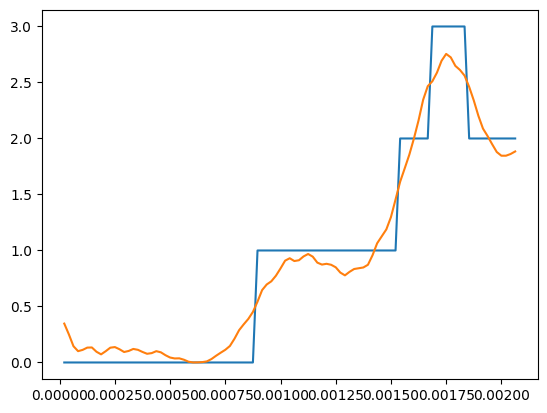

In [155]:
t= np.arange(0,len(x)/fs , 1/fs)
t1  =  t[1:100]
sD1  = sD[50002:50101]
sA1 =  sA[50002:50101]
plt.plot(t1,sD1)
plt.plot(t1,sA1)
print(len(t1),len(sD1),len(sA1))


plt.show()

### RESPUESTA A LA PREGUNTA 5.1
Al realizarse el analisis punto a punto entre la señal analoga y digital, se considera un umbral para la señal analoga, por ejemplo, para valores entre 0.5 y 0, se representa digitalmente como un cero, cuando la señal está entre 1 y 0.5 , el equivalente digital es un 1, y así sucesivamente.

#TRANSMISION


##5.2


###Funciones de la sección

In [157]:
def repeater(x , noise_amplitude , attenuation ) :
    x = x*attenuation
    Noise = np.random.uniform ( - noise_amplitude , noise_amplitude , len( x ) )
    x = x + Noise
    x = x / attenuation
    return x

def analog_tx(x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ):
        x = repeater (x , noise_amplitude , attenuation )
    return x

def digital_tx(x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ):
        x = np.round ( repeater (x , noise_amplitude , attenuation ) )
    return x

def SNR( noisy , original ):
    # power of the error
    err = np.var ( original - noisy )
    # power of the signal
    sig = np.var ( original )
    # SNR in dBs
    return 10*np.log10 ( sig / err )

<ipython-input-157-bb2d9f0316de>:24: RuntimeWarning: divide by zero encountered in double_scalars
  return 10*np.log10 ( sig / err )


Relación señal a ruido para la señal analoga:  19.214984693118936
Relación señal a ruido para la señal digital:  inf


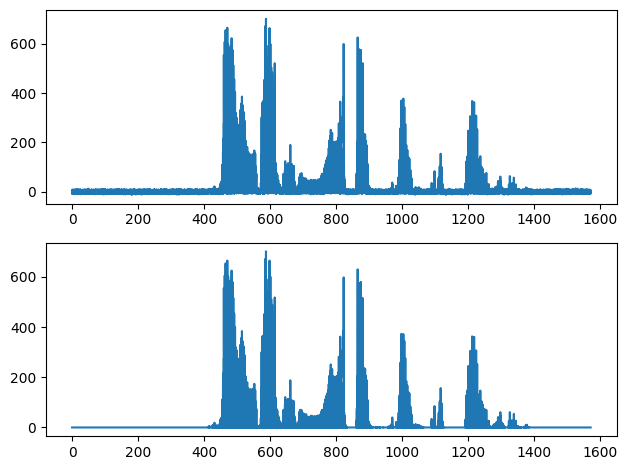

In [179]:
Analog_signal=analog_tx(sA,150,0.15,0.35)
Digital_signal=digital_tx(sD,150,0.15,0.35)

relacionsA= SNR(Analog_signal,sA)
relacionsD= SNR(Digital_signal,sD)

print("Relación señal a ruido para la señal analoga: ",relacionsA)
print("Relación señal a ruido para la señal digital: ",relacionsD)

tA=t= np.arange(0,float(len(sA))/fs , 1/fs)
tD=np.arange(0,float(len(sD))/fs , 1/fs)

plt.subplot(211)
plt.plot(tA,Analog_signal)
plt.subplot(212)
plt.plot(tD,Digital_signal)
plt.tight_layout()
plt.show()

###RESPUESTA A LA PREGUNTA 5.2
Si bien, a simplevista las graficas se ven muy similares, haciendo una vista mas detallada, se nota una menor aparicion de ruida en la senal digital, caso contrario con la analoga.
Ademas, con la obtencion de una relacion SNR muy grande en la digital, en este caso arrojando un valor inf , la probabilidad de error de bit se vuelve casi cero, lo cual logra que no haya errores en la senal.

<ipython-input-157-bb2d9f0316de>:24: RuntimeWarning: divide by zero encountered in double_scalars
  return 10*np.log10 ( sig / err )


Relación señal a ruido para la señal analoga:  [30.97794940080028, 28.96266654291391, 27.587210288591674, 26.533121361112308, 25.688949757140914, 24.96673662691454, 24.36440101823292, 23.835202370858003, 23.39484256696112, 22.934268018174308, 22.520294046663444, 22.202228961642025, 21.85367323743251, 21.557514120562832, 21.29474033992938]
Relación señal a ruido para la señal digital:  [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


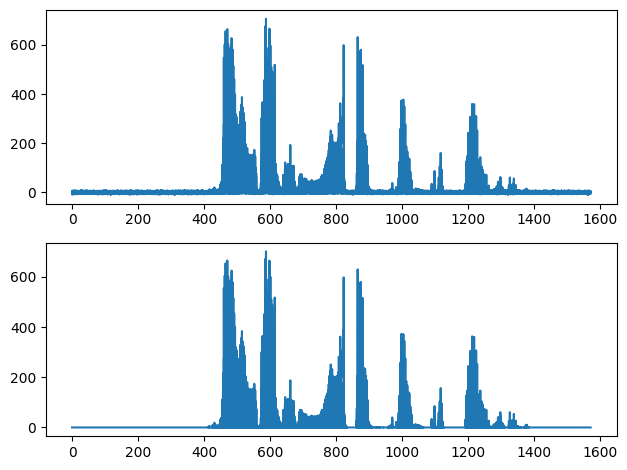

In [178]:
SNRA = []
SNRD = []

for i in range(10 , 100 ,6):
    Analog_signal=analog_tx(sA, i, 0.15, 0.35)
    Digital_signal=digital_tx(sD, i, 0.15, 0.35)
    SNRA.append(SNR(Analog_signal,sA))
    SNRD.append(SNR(Digital_signal,sD))

print("Relación señal a ruido para la señal analoga: ",SNRA)
print("Relación señal a ruido para la señal digital: ",SNRD)
t=np.arange(10, 100 , 5) # Vector de tiempo


plt.subplot(211)
plt.plot(tA,Analog_signal)
plt.subplot(212)
plt.plot(tD,Digital_signal)
plt.tight_layout()
plt.show()

#Conclusiones Generales
<ul>
  <li>
    En lo que respecta al muestreo de una señal, cuando su frecuencia fs se duplica o disminuye, lo que va a ocurrir con el audio es la forma en que se va a escuchar.
  </li>
  <li>
    Es importante muestrear por que permite almacenar y transmitir de forma eficiente tratandose de una señal digital, la cual es útil en trasnmisión de audio, video, y datos a traves de redes de comunicación
  </li>

  <li>
    Muestrear en bajas frecuencias puede llevar a perdidas en la información
  </li>
  <li>
    El muestreo mediante nyquist si bien en la teoria se dice que debe ser mayor o como minimo igual a 2fmax, al momento de hacer esto con una señal senosoidal, deja ver como al tomar el caso extremo de la igualdad, al momento de comparar con la señal original, no muestra adecuadamente la señal, generando algo asi como una recta rara, por otro lado, cuando se consideró la señal con una frecuencia mucho mayor, se logra ver que la representación de la señal mejora considerablemente.
  </li>

  <li>
    Cuando se requiere cuantificar una señal, es necesario tener certeza de la tasa de bits a la cual se quiere hacer, ya que según sea el valor de bits, la señal tendrá más o menos información, cosa que es muy importante según la calidad de la misma y los requerimientos, un ejemplo de esto puede ser el audio de un estudio de grabación.
  </li>
  <li>
    Cuando se realiza el muestreo de una señal, es posible que se cometa un error al considerar la frecuencia máxima y aplicar incorrectamente el criterio de Nyquist. Aunque este criterio sigue siendo relevante, al representar la señal resultante, podría parecer sorprendentemente similar a la original. No obstante, este engañoso parecido da lugar a un fenómeno conocido como aliasing. Este efecto se manifiesta como información falsa en la señal, por más que su similitud con la señal original pueda ser notable.
  </li>

</ul>